[^ gor: Uvod](00_uvod.ipynb)

# Reševanje enačb z navadno iteracijo
Pri [rekurzivnih zaporedjih](http://localhost:8888/notebooks/02a_zaporedja.ipynb#Rekurzivna-zaporedja) smo videli, da za zaporedje, ki zadošča rekurzivni formuli
$$x_{n+1}= g(x_n)$$
velja, da je  je limita zaporedja $x_n$, vedno rešitev enačbe
$$x=g(x).$$
Pri tem smo predpostavili, da limita sploh obstaja in da je $g$ **zvezna** funkcija. 

Trditev lahko obrnemo. Ničlo funkcije  $f(x)$ lahko poiščemo z rekurzivnim zaporedjem približkov
$$x_{n+1} = g(x_n),$$
če enačbo 
$$f(x) = 0$$
preoblikujemo v ekvivalentno enačbo oblike
$$ x = g(x).$$ 
Žal ne bo vsaka funkcija $g$ dobra, saj  moramo poskrbeti, da zaporedje $x_n$ dejansko konvergira.

## Primer
Reši enačbo
$$x=2^{-x}.$$

## Rešitev
Rekurzivna formula se kar sama ponuja. 
$$x_{n+1} = 2^{-x_n}.$$

Seveda nam nič ne zagotavlja, da bo zaporedje $x_n$ dejansko konvergentno. A poskusiti ni greh, pravijo. 

In [9]:
g = lambda x: 2**(-x)
xp = 1 # začetni približek 
for i in range(15):
    xp = g(xp)
    print(xp)
print("Razlika med desno in levo stranjo enačbe je", xp-2**(-xp))

0.5
0.7071067811865476
0.6125473265360659
0.6540408600420695
0.6354978458133738
0.6437186417228692
0.6400610211772396
0.6416858070429984
0.6409635371779632
0.6412845090665851
0.6411418514717377
0.6412052524498624
0.6411770745288387
0.6411895977668723
0.6411840319786225
Razlika med desno in levo stranjo enačbe je -2.473635338007263e-06


Videti je, da zaporedje konvergira in sicer natanko k rešitvi enačbe. Opazimo tudi, da za vsako pravilno decimalko potrebujemo približno 3 korake rekurzije.
## Konvergenca

Zdi se, da zaporedje približkov konvergira, vendar nekaj izračunanih členov ni dovolj, da bi bili povsem prepričani v konvergenco. Na srečo velja izrek, ki za rekurzivna zaporedja zagotavlja konvergenco:

### Izrek o konvergenci iteracije
Naj bo $x_n$ zaporedje podano z začetnim členom $x_0$ in rekurzivno formulo $x_{n+1}=g(x_n)$. Naj bo $x_p$ rešitev enačbe $x=g(x)$ in naj bo  $|g'(x)|<1$ za vse $x\in[x_p-\varepsilon,x_p+\varepsilon]$. Če je $x_0\in [x_p-\varepsilon,x_p+\varepsilon]$, je zaporedje $x_n$ konvergentno in je limita enaka 
$$\lim_{n\to\infty}x_n=x_p.$$

Izrek nam pove, da je konvergenca rekurzivnega zaporedja odvisna od velikosti odvoda iteracijske funkcije v rešitvi enačbe. Če je 
$$|g'(x_p)|<1$$ 
bo za začetni približek, ki je dovolj blizu rešitve, zaporedje podano z rekurzivno formulo $x_{n+1}=g(x_n)$ konvergiralo k rešitvi. 

In [21]:
import sympy as sym
from IPython.display import display
sym.init_printing(use_latex=True)

x = sym.Symbol('x')
dg = sym.diff(g(x),x)
print("Odvod iteracijske funkcije: ")
display(dg)
print("Odvod g(x) v rešitvi", dg.subs(x,xp).evalf())

Odvod iteracijske funkcije: 


Odvod g(x) v rešitvi -0.444436618579400


Odvod v rešitvi je približno -0.44, kar je po absolutni vrednosti manj od 1. To pomeni, da zaporedje približkov konvergira.
## Hitrost konvergence
Ko iščemo rešitev enačbe z rekurzivnim zaporedjem, nas seveda zanima, koliko korakov je potrebnih za določeno število decimalk. To najlažje predstavimo z grafom napake v logaritemski skali.

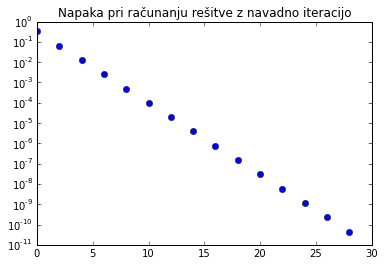

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
xp = sym.solve(sym.Eq(x,g(x)),x)[0].evalf() # točna rešitev

n = 30;
xz = [1] # zaporedje približkov
for i in range(n-1):
    xz.append(g(xz[-1]))
napaka = [x - xp for x in xz] # zadnji približek vzamemo za točno rešitev
plt.semilogy(range(n),napaka,'o')
plt.title("Napaka pri računanju rešitve z navadno iteracijo")

Napaka pada podobno kot pri bisekciji. Za vsako pravilno decimalko potrebujemo približno 3 korake.

In [5]:
import disqus
%reload_ext disqus
%disqus matpy